# Problem Statement

### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

# Business Goal:

### You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1 : Importing Necessary Libraries

In [1]:
import numpy as np , pandas as pd
import matplotlib
import matplotlib.pyplot as plt , seaborn as sns
from matplotlib import style
sns.set(style='whitegrid')

import statsmodels as sml
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import scipy.stats as stats

### warnings
import warnings
warnings.filterwarnings('ignore')
#calender
import calendar

## Step 2 : Load and Understand the Data

In [3]:
boombikes=pd.read_csv('day (1).csv')

In [4]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boombikes.shape

(730, 16)

In [6]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As per the Data Dictionary , variable "instant" is the index of the each record in the data , hence let's make it the index of the dataframe

In [7]:
boombikes.set_index("instant",inplace=True)

In [8]:
boombikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
boombikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
boombikes.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Renaming few of the columns for better readibility

In [11]:
boombikes.rename(columns={'yr':'year','mnth':'month','hum':'humidity', 'cnt':'count'}, inplace=True)
boombikes.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### There are some categorical variables which have a range of numeric data. Lets convert them

In [12]:
# converting yr
year_dict={0:'2018',1:'2019'}
boombikes['year'] = boombikes['year'].map(year_dict)
# converting month
month_dict={ i:calendar.month_abbr[i] for i in range(1,13)  }
boombikes['month'] = boombikes['month'].map(month_dict)
# converting season
season_dict={1:'spring',2:'summer',3:'fall',4:'winter'}
boombikes.season = boombikes.season.map(season_dict)
# converting weathersit
weathersit_dict={1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'}
boombikes.weathersit = boombikes.weathersit.map(weathersit_dict)
# converting weekday
weekday_dict={0:"tuesday",1:"wednesday",2:"thrusday",3:"friday",4:"saturday",5:"sunday",6:"monday"}
boombikes.weekday = boombikes.weekday.map(weekday_dict)

In [13]:
cat_cols_dict = { "year_dict":year_dict,
         "month_dict":month_dict,
         "weekday_dict":weekday_dict,
         "season_dict":season_dict,
         "weathersit_dict":weathersit_dict
}

#### We actually dont need the "dteday" column since there are separate columns for month and day . Let's drop "dteday" column

In [14]:
boombikes.drop('dteday', inplace=True, axis=1)

In [15]:
boombikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
instant,,,,,,,,,,,,,,
1,spring,2018,Jan,0,monday,0,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
2,spring,2018,Jan,0,tuesday,0,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
3,spring,2018,Jan,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,spring,2018,Jan,0,thrusday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,spring,2018,Jan,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Our target variable ins "cnt" - which denotes the count of total rental bikes including both "casual" and "registered". Since "casual" and "registered" is just a breakup of count variable, let's drop it also as it is redundant for our analysis 

In [16]:
boombikes.drop(['casual','registered'], inplace=True, axis=1)

## Step 3 : Missing Value Check

In [17]:
boombikes.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

#### Observation - No null record is found in the data

## Step 4 : Segmentation of Columns

In [18]:
boombikes.nunique()

season          4
year            2
month          12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
humidity      594
windspeed     649
count         695
dtype: int64

#### We actually dont need the 'dteday' column since there are separate columns for month and day

In [19]:
num_cols=["temp","atemp","humidity","windspeed","count"]
cat_cols=["season","year","month","holiday","weekday","workingday","weathersit"]

## Step 5: Exploratory Data Analysis

## Univariate Analysis

### Numerical Columns

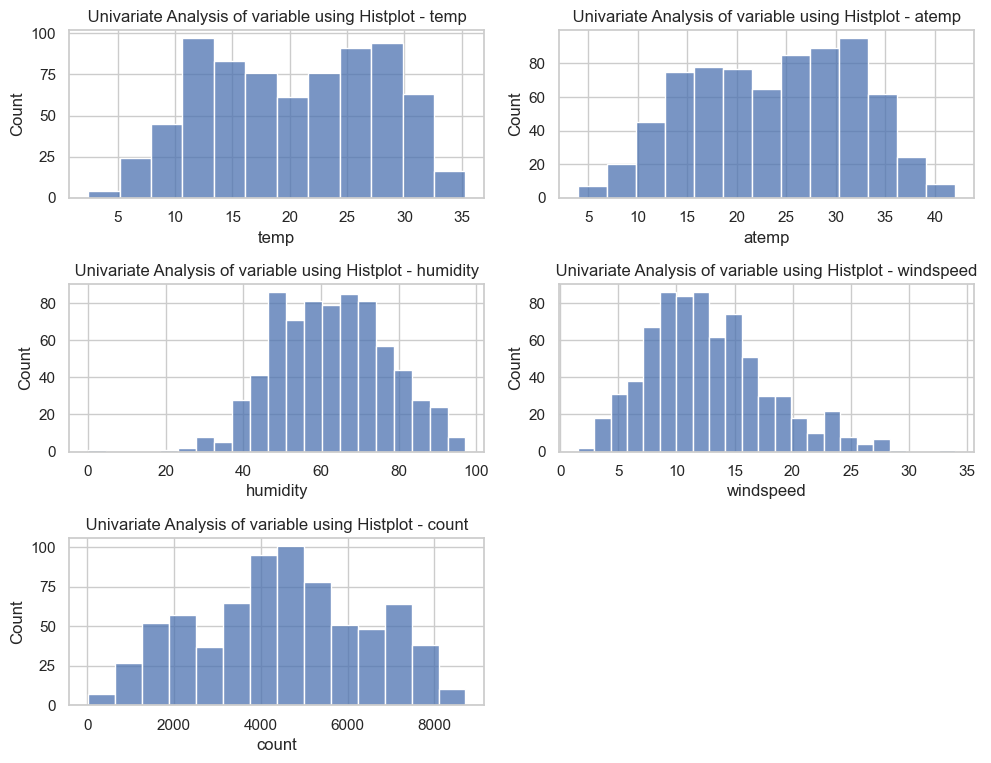

In [20]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.histplot( x=boombikes[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Histplot - {col} ' )
plt.tight_layout()
plt.show()

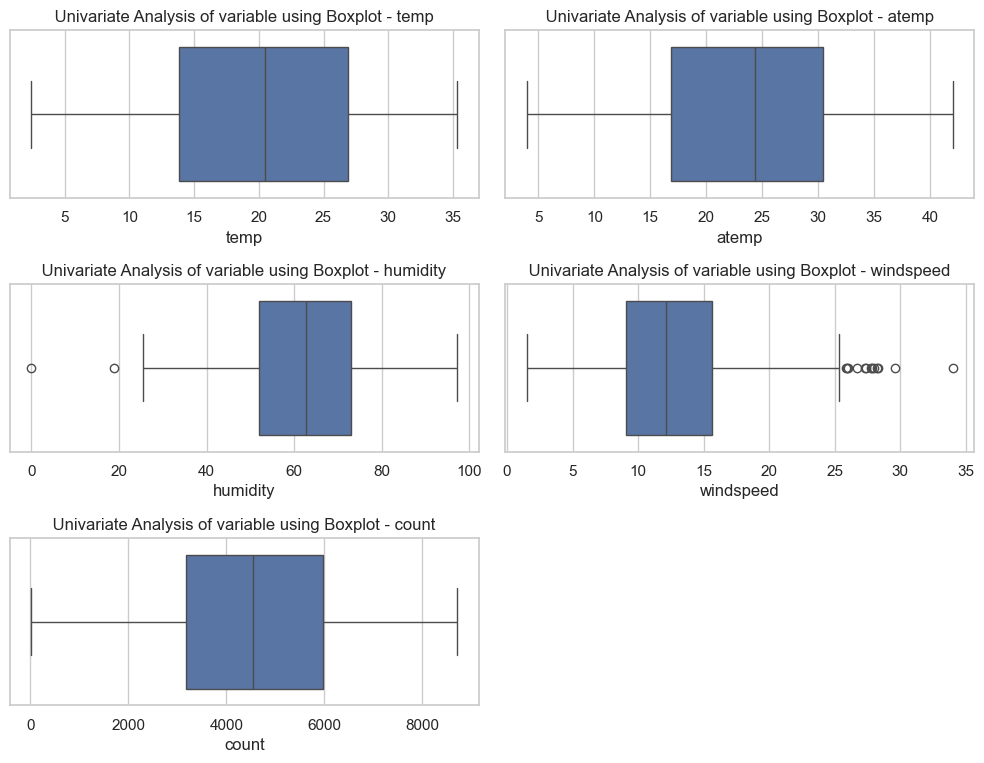

In [21]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.boxplot( x=boombikes[col] , color='#4C72B0' )
    plt.title( f' Univariate Analysis of variable using Boxplot - {col} ' )
plt.tight_layout()
plt.show()

In [22]:
def remove_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove outliers
        df = df[ (df[col] >= lower_bound) & (df[col] <= upper_bound) ]
        print(f" Current Shape after removing outliers of {col}  : " , df.shape)
    return df

In [23]:
for i in num_cols:
    print(f'Quartile info for variable {i} - ' , np.quantile( boombikes[i] , [0.00,0.01, 0.02 ,0.03,0.04,0.05 , 0.25, 0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99,1] ) )

Quartile info for variable temp -  [ 2.4243464   5.98547028  6.89098972  7.46369863  8.05196048  8.74702405
 13.81188525 20.4658265  26.88061475 29.998347   31.5204597  32.05278689
 32.99953552 33.86805    35.328347  ]
Quartile info for variable atemp -  [ 3.95348    7.2904925  8.112616   9.4065905 10.221912  11.0307125
 16.8897125 24.368225  30.445775  33.90821   35.749975  36.62907
 37.4401    38.94165   42.0448   ]
Quartile info for variable humidity -  [ 0.       31.209593 35.755014 38.102619 40.013328 40.741735 52.
 62.625    72.989575 81.7625   86.868735 89.54055  90.830814 92.795857
 97.25    ]
Quartile info for variable windspeed -  [ 1.5002439   3.54899255  4.1495311   4.45853289  4.9238091   5.32605211
  9.04165    12.125325   15.62558925 19.8339966  22.9999878  23.99916684
 25.20162656 27.38094762 34.000021  ]
Quartile info for variable count -  [  22.    689.38  971.76 1025.18 1162.8  1330.   3169.75 4548.5  5966.
 7293.8  7576.4  7733.39 7867.1  8163.81 8714.  ]


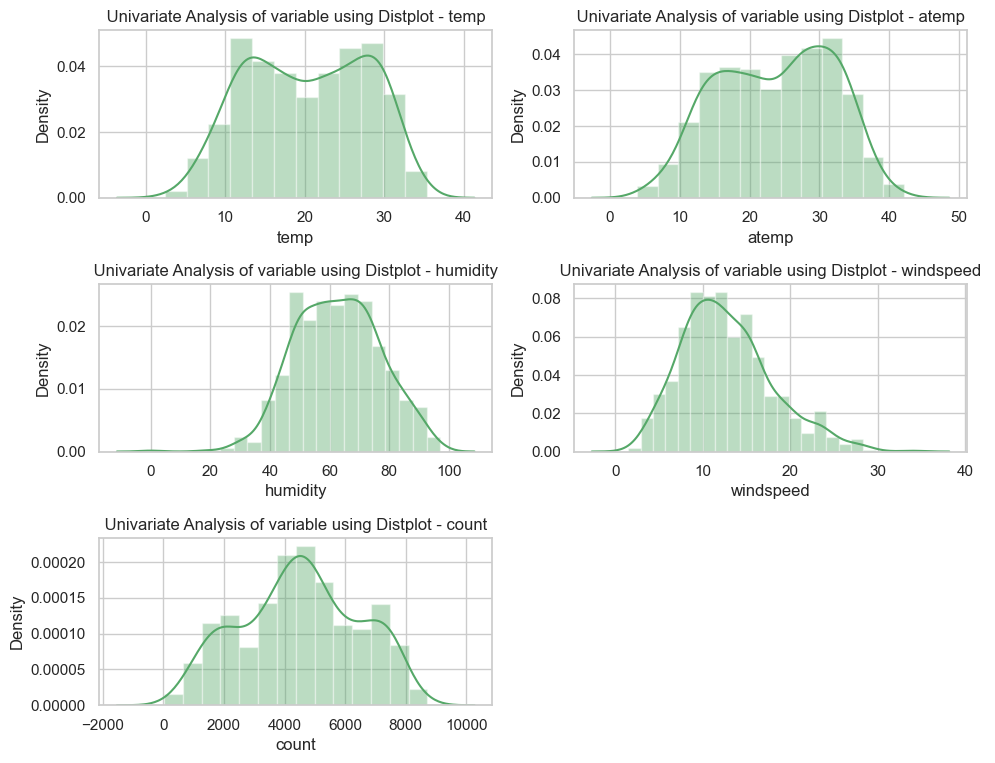

In [24]:
plt.figure(figsize=(10,20))
for ax , col in enumerate(num_cols):
    plt.subplot(8, 2, ax+ 1)
    sns.distplot( boombikes[col] , color='#55A868' )
    plt.title( f' Univariate Analysis of variable using Distplot - {col} ' )
plt.tight_layout()
plt.show()

#### Observation - 
    1. The distributions appear to be normal and balanced.
    2. The percentile values are consistent and show a continuous pattern.
    3. No outlier treatment is needed right now. 

### Categorical Columns

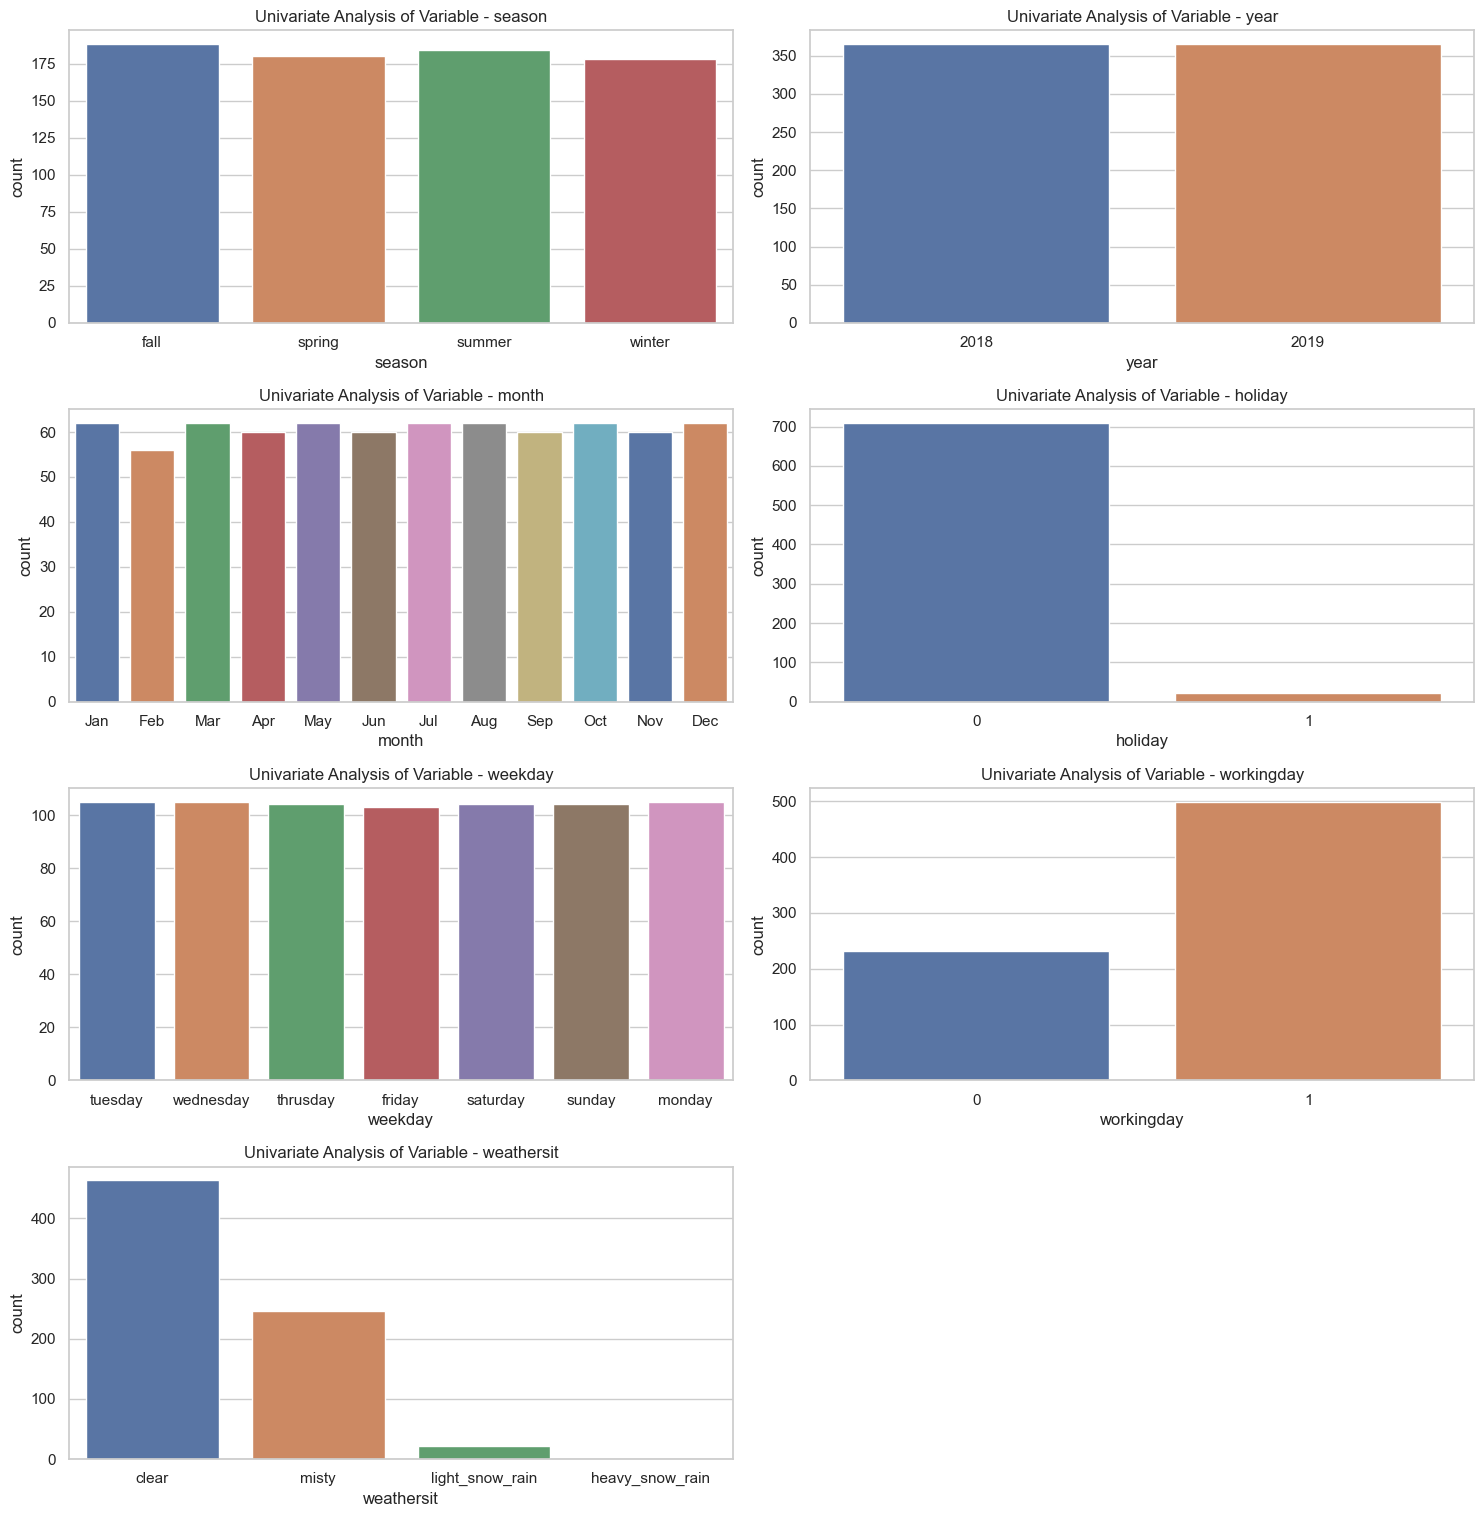

In [25]:
plt.figure(figsize=(15,30))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    if col in ('year','month','weekday' ,'weathersit') :
        dictname=col+"_dict"
        sort_order=list(cat_cols_dict.get(dictname).values())
    else :
        sort_order=sorted(boombikes[col].unique())
    sns.countplot( data=boombikes , x=col , palette='deep' ,order=sort_order)
    plt.title( f'Univariate Analysis of Variable - {col}' )
plt.tight_layout()
plt.show()

#### Observation -
    1. The count of observations is fairly balanced across all four seasons, yr , mnth , weekday.
    2. There are more observations on working days compared to non-working days.
    3. There are significantly more observations on non-holidays compared to holidays.

## Bivariate Analysis

### Numerical Vs Numerical

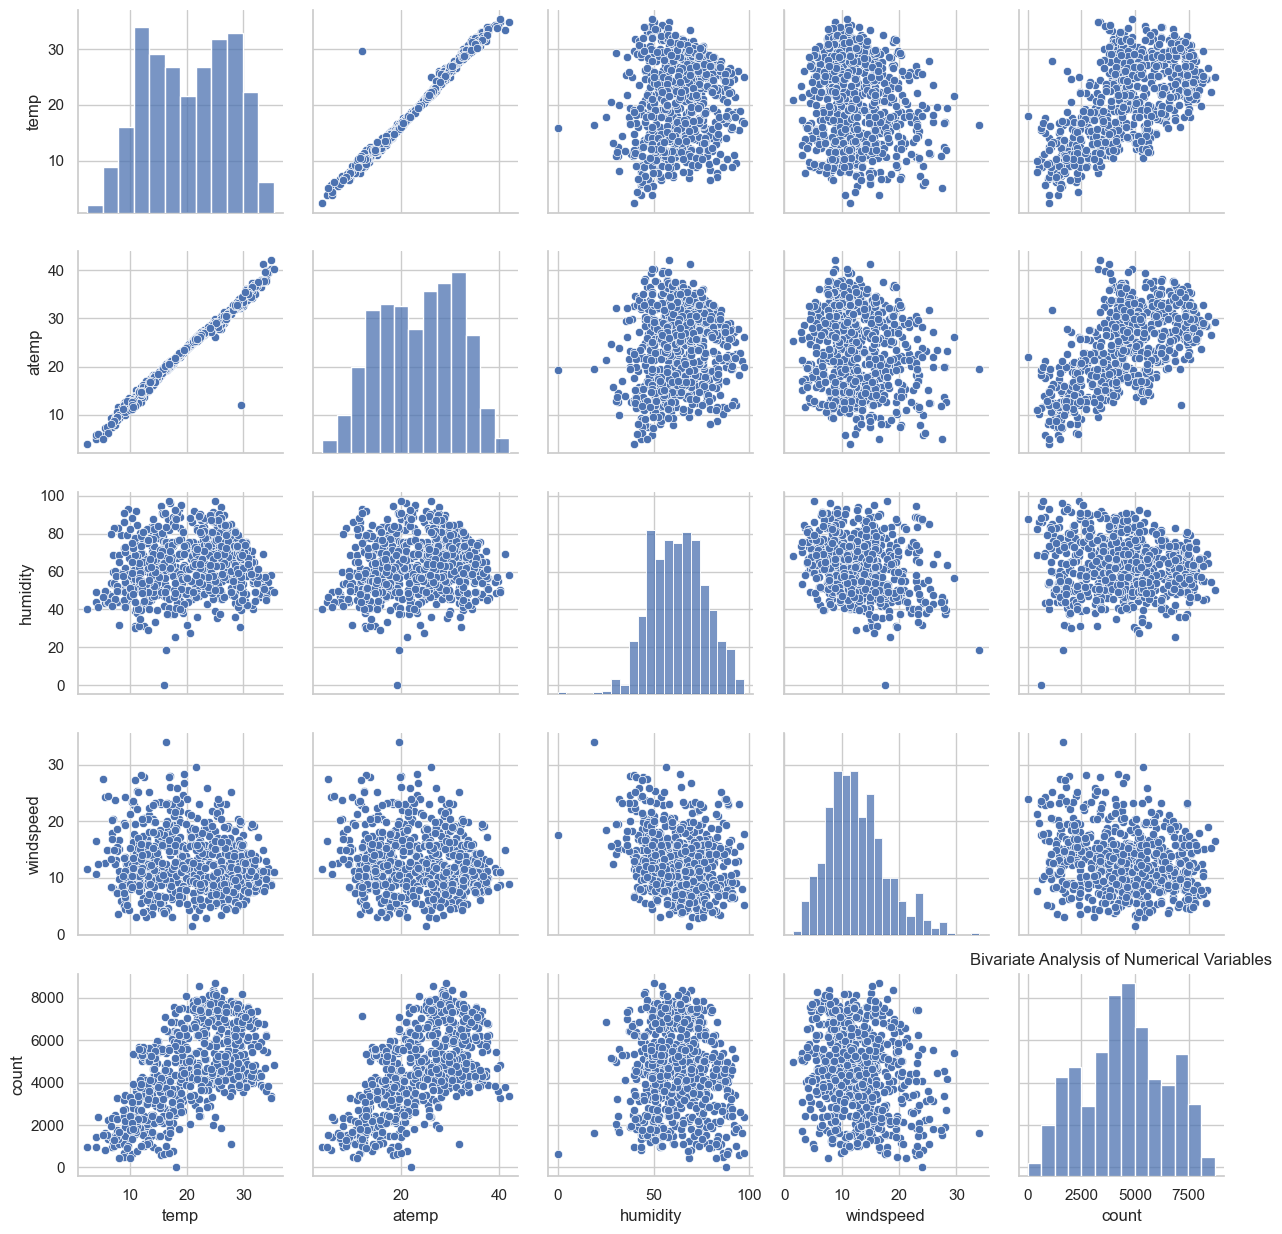

In [26]:
sns.pairplot(boombikes[num_cols] , palette='deep')
plt.title( 'Bivariate Analysis of Numerical Variables' )
plt.tight_layout()
plt.show()

#### Observartion 
    1. Temperature (temp) , Feeling Temperature (atemp) vs Count (cnt): There appears to be a positive correlation with bike rental count.
    2. Humidity (hum) , indspeed vs Count (cnt) : The scatter plot shows  a wide spread of points, suggesting a weak correlation or slightly negative correlation
    3. Casual , Registered vs Count (cnt) : A strong positive correlation is observed 


###  Numerical Vs Categorical

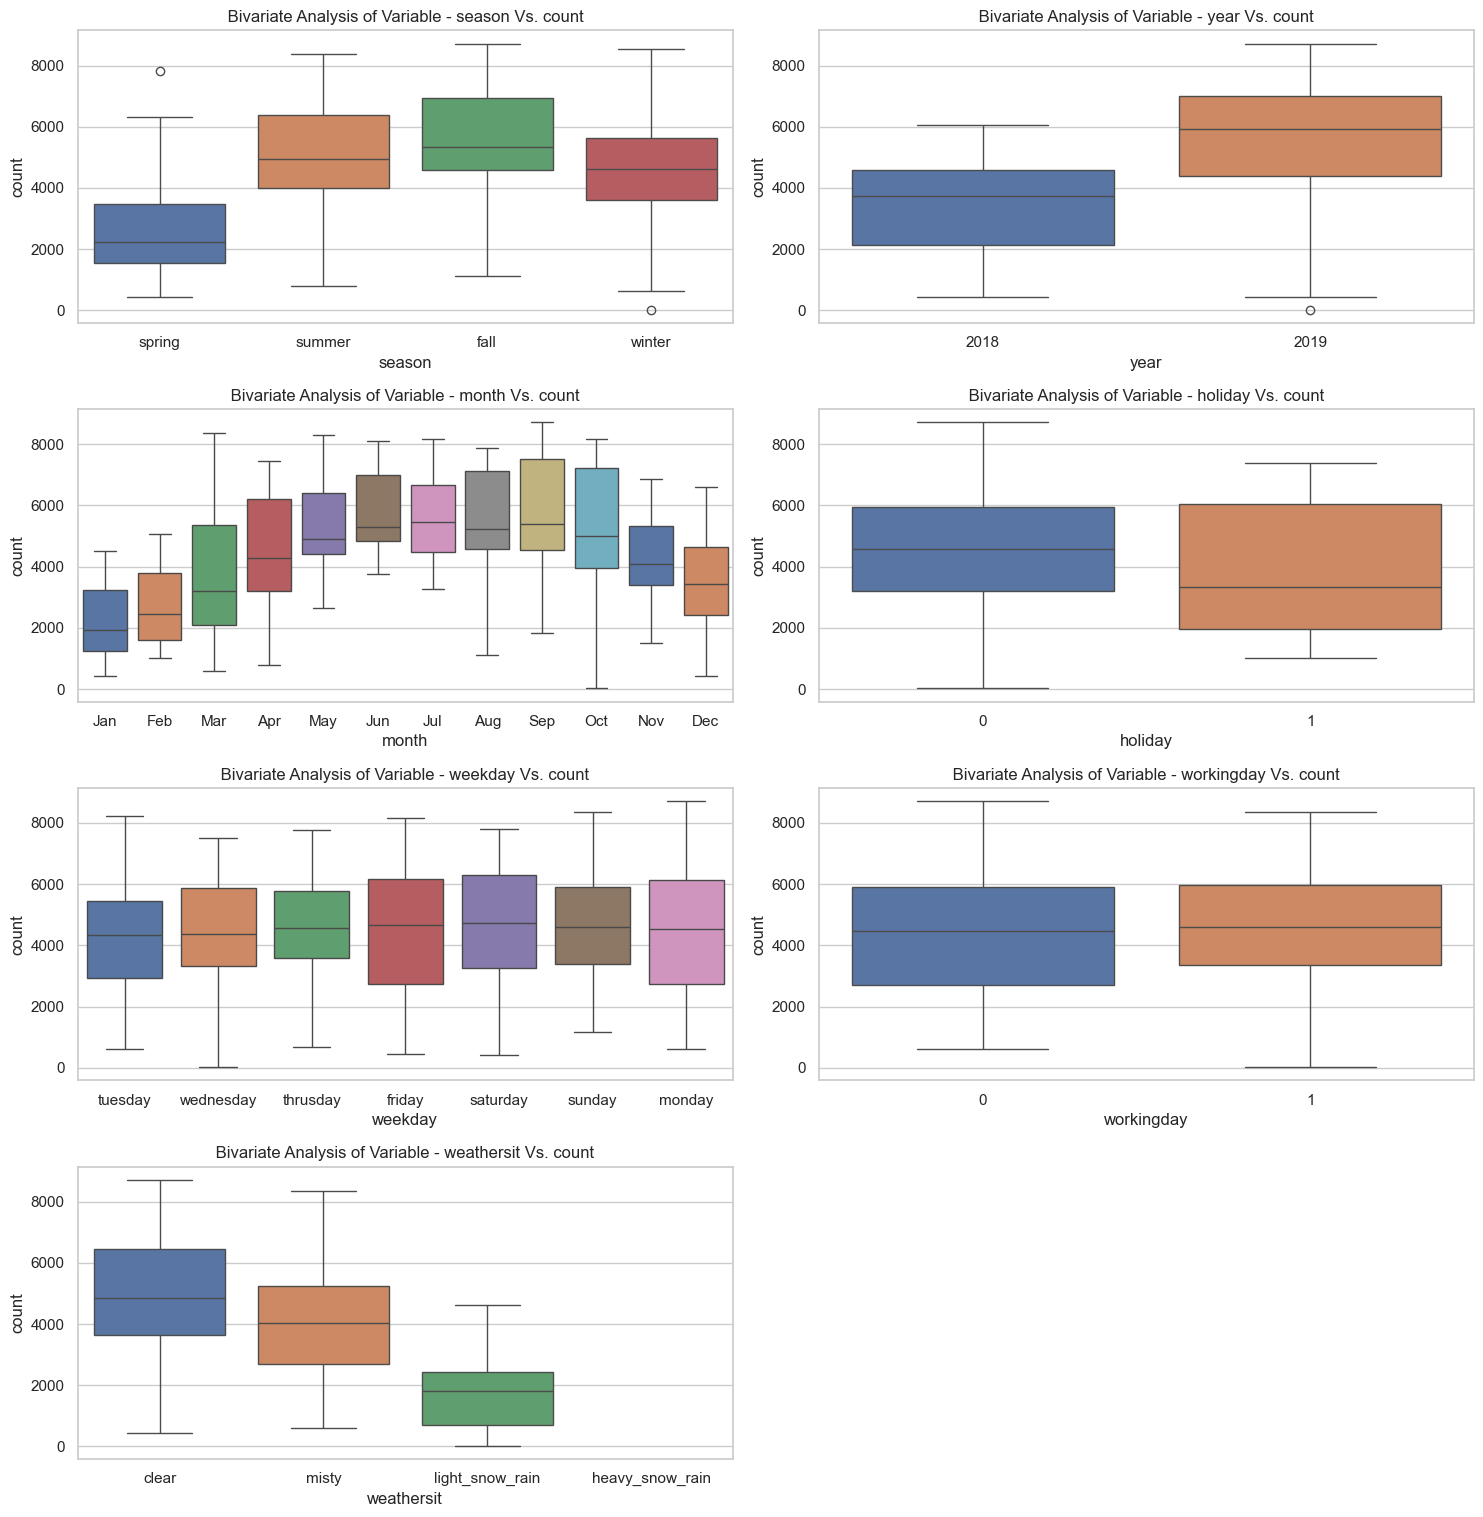

In [27]:
plt.figure(figsize=(15,30))
for ax , col in enumerate(cat_cols):
    plt.subplot(8, 2, ax+ 1)
    if col in ('year','month','weekday' , 'season' , 'weathersit') :
        dictname=col+"_dict"
        sort_order=list(cat_cols_dict.get(dictname).values())
    else :
        sort_order=sorted(boombikes[col].unique())
    sns.boxplot(x=boombikes[col] , y=boombikes["count"] , palette='deep' ,order=sort_order)
    plt.title( f' Bivariate Analysis of Variable - {col} Vs. count ' )
plt.tight_layout()
plt.show()

#### Observations :
    1. Season vs Count : Season "Fall" shows the highest median rental count, while season "Spring" has the lowest.
    2. Year  vs Count : The median rental count is higher in the second year 2019 compared to the first year 2018.
    3. Month  vs Count : Rental counts are higher during the middle of the year, with peaks around June, July, and September, and lower counts in January.
    4. Holiday vs Count : Non-holidays have higher median rental counts compared to holidays.
    5. Weekday vs Count : The rental counts are relatively consistent across all weekdays.
    6. Working day vs Count : Working days have a higher median rental count compared to non-working days , indicating higher bike usage on workdays.
    7. Weathersit vs Count : The best weather situation "Clear sky" has the highest median rental count, while the worst weather situation "Light snowy rain" shows the lowest. There is no observation for "Heavy snowy rain".

## Multivariate Analysis

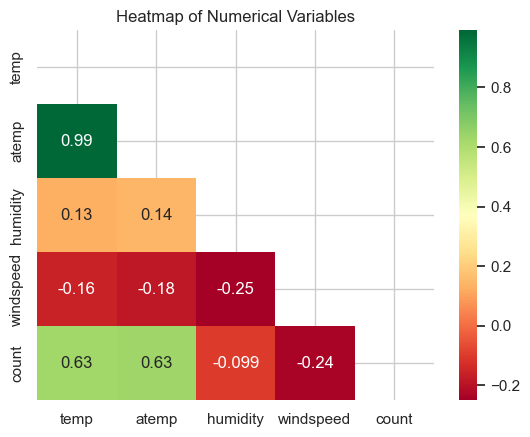

In [28]:
mask = np.triu(boombikes[num_cols].corr())
sns.heatmap(boombikes[num_cols].corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

#### Observations-
    1. Strong Positive Correlations:
        - Temperature (temp) with Count 
        - Feeling Temperature (atemp) with Count 
        - Registered Users (registered) with Count 
    2. Moderate Positive Correlations:
        - Casual Users (casual) with Count 
    3. Weak Positive Correlations:
        - Humidity  with Feeling Temperature (atemp)
        - Humidity  with Temperature (temp)
    4. Weak Negative Correlations:
        - Windspeed (windspeed) with Count 
        - Humidity  with Count 
        - Windspeed (windspeed) with Feeling Temperature (atemp)
        - Windspeed (windspeed) with Temperature (temp)
    5. Neutral Correlations:
        - Humidity  with Casual Users (casual)
        -Humidity  with Registered Users (registered)
        - Windspeed (windspeed) with Casual Users (casual)
        - Windspeed (windspeed) with Registered Users (registered)

### From the Exploratory Data Analysis , we can conclude the following - 

    - Bike rental counts are lowest in spring and highest in fall, with summer showing significantly peak rentals.
    - There was an increase in bike rentals in 2019 compared to 2018.
    - Data for heavy_snow_rain weather situations is missing, potentially affecting analysis of extreme weather impacts.
    - Bike rentals peak in June, July, and September, with lower counts in January.
    - More bike rentals occur on working days compared to non-working days.
    - Rental counts are higher on non-holidays compared to holidays.
    - Rental demand remains consistent across all weekdays.
    - Favorable weather "Clear Sky" correlates with higher rental counts, while poor weather "Light snowy rain" correlates with lower counts. There is no occurance for "Heavy snowy rain".
    - Strong positive correlations exist between temperature (temp/atemp) and rental counts.
    - Registered users show a strong positive correlation with rental counts.
    - Casual users also positively correlate with rental counts, though less strongly than registered users.
    - Humidity and windspeeds show weak correlations with rental counts and other variables.
    - Humidity and windspeeds show weak correlations with rental counts and other variables.
    - Bike rentals increase from March to June and decrease towards the end of the year.
    - Higher temperatures (temp/atemp) positively influence rental counts.

### Here , the target variable is 'count'. There is clearly a linear relationship between 'count' and 'temp' , 'atemp' ,'casual', 'registered'  . Hence we can go for a linear regression model

## Step - 6: Data Preparation Steps : Dummy Variable Creation (One Hot Encoding)

In [29]:
boombikes[cat_cols].nunique()

season         4
year           2
month         12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

#### We now need to create dummy variables for the below columns - 
- year
- month
- weekday
- season
- weathersit

In [30]:
dummy_data=pd.get_dummies(boombikes[['year','month','weekday','season','weathersit']], dtype=int, drop_first=True)
dummy_data.head()

,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Adding dummy variables to original dataset

In [31]:
boombikes_df=pd.concat([boombikes,dummy_data],axis=1)

#### Since columns 'season','mnth','weekday','weathersit' are no longer needed for machine learning model , we can drop them

In [32]:
boombikes_df=boombikes_df.drop(['year','month','weekday','season','weathersit'], axis = 1)

In [33]:
boombikes_df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Step 7 : Train-Test Split : Splitting the Data into Training and Testing Sets

### We will now split the dataset into training and testing datasets having 70% and 30% data respectively

In [34]:
boombikes_df_train, boombikes_df_test=train_test_split( boombikes_df, train_size=0.70 , random_state=100 )
print(boombikes_df_train.shape, boombikes_df_test.shape , boombikes_df.shape)

(510, 30) (220, 30) (730, 30)


In [35]:
boombikes_df_train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
instant,,,,,,,,,,,,,,,,,,,,,
577,0,1,29.246653,33.1448,70.4167,11.083475,7216,1,0,0,...,0,0,1,0,0,0,0,0,0,0
427,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,1,0,0,0,1
729,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,1,...,0,0,0,1,0,1,0,0,0,0
483,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,...,0,0,0,0,0,0,1,0,0,1
112,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,0,...,0,1,0,0,0,0,1,0,0,1


## Feature Scaling : Min-Max scaling 

In [36]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'count']

In [37]:
filter_to_scale = num_cols
scaler=MinMaxScaler()
boombikes_df_train[filter_to_scale]=scaler.fit_transform(boombikes_df_train[filter_to_scale])
boombikes_df_test[filter_to_scale]=scaler.transform(boombikes_df_test[filter_to_scale])

In [38]:
boombikes_df_train=pd.DataFrame(boombikes_df_train,columns=boombikes_df_train.columns)
boombikes_df_test=pd.DataFrame(boombikes_df_test,columns=boombikes_df_test.columns)

In [39]:
boombikes_df_train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,...,weekday_saturday,weekday_sunday,weekday_thrusday,weekday_tuesday,weekday_wednesday,season_spring,season_summer,season_winter,weathersit_light_snow_rain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.096078,0.084314,...,0.133333,0.127451,0.131373,0.143137,0.150980,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.294988,0.278131,...,0.340268,0.333805,0.338139,0.350557,0.358381,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Feature scaling is done . All values are converted between 0 and 1. 

In [40]:
y_train=boombikes_df_train["count"]
X_train_df=boombikes_df_train.drop("count",axis=1)
y_test=boombikes_df_test["count"]
X_test_df=boombikes_df_test.drop("count",axis=1)

## Step 8 : Model Building - Building the initial linear model ( Model 0 )

In [41]:
X_train_sm=sm.add_constant(X_train_df)
X_test_sm=sm.add_constant(X_test_df)
model0=sm.OLS(np.array(y_train),X_train_sm)
result0=model0.fit()
result0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.81e-180
Time:                        01:24:49   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2409      0.036      6.781      0.000       0.171       0.311
holiday                        0.0074      0.024      0.303      0.762      -0.040       0.055
workingday                     0.0927      0.012      7.685      0.000       0.069       0.116
temp                           0.3880      0.142      2.727      0.007       0.108       0.668
atemp                          0.0590      0.138      0.426      0.670      -0.213       0.331
humidity                      -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
year_2019                      0.2325      0.008     28.794      0.000       0.217       0.248
month_Aug                      0.0223      0.034      0.657      0.511      -0.044       0.089
month_Dec                     -0.0443      0.034     -1.316      0.189      -0.110       0.022
month_Feb                     -0.0323      0.033     -0.980      0.327      -0.097       0.032
month_Jan                     -0.0631      0.034     -1.876      0.061      -0.129       0.003
month_Jul                     -0.0327      0.035     -0.931      0.352      -0.102       0.036
month_Jun                      0.0060      0.025      0.241      0.810      -0.043       0.055
month_Mar                      0.0016      0.025      0.063      0.950      -0.047       0.050
month_May                      0.0255      0.021      1.208      0.228      -0.016       0.067
month_Nov                     -0.0398      0.036     -1.093      0.275      -0.111       0.032
month_Oct                      0.0077      0.036      0.215      0.830      -0.063       0.078
month_Sep                      0.0868      0.032      2.711      0.007       0.024       0.150
weekday_monday                 0.0975      0.014      7.203      0.000       0.071       0.124
weekday_saturday              -0.0038      0.015     -0.261      0.794      -0.033       0.025
weekday_sunday                 0.0059      0.015      0.394      0.694      -0.023       0.035
weekday_thrusday              -0.0125      0.015     -0.851      0.395      -0.042       0.016
weekday_tuesday                0.0433      0.014      3.152      0.002       0.016       0.070
weekday_wednesday             -0.0157      0.015     -1.074      0.283      -0.044       0.013
season_spring                 -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer                  0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter                  0.1071      0.028      3.826      0.000       0.052       0.162
weathersit_light_snow_rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_misty              -0.0595      

### Observations :
1. Condition Number: 1.45e+16 suggests potential multicollinearity issues, as a high condition number often indicates that some predictors are highly correlated.
2. Smallest Eigenvalue: 8.18e-30, which is very close to zero, also points to possible multicollinearity or singularity in the design matrix.
3. Non-Significant Predictors: Lot of variables such as holiday, atemp, month_Aug, month_Dec, month_Feb, month_Jan, month_Jul, month_Jun, month_Mar, month_May, month_Nov, month_Oct, weekday_saturday, weekday_sunday, weekday_thursday, weekday_wednesday, season_spring, and season_summer have 
p-values > 0.05, indicating they are not statistically significant at the 5% level.

#### So, we'll have to perform Feature Selection process to identify the most significant important variables

## Step 9 : Feature Selection : Using RFE and Manual Selection methods

### Manual Feature Selection methods

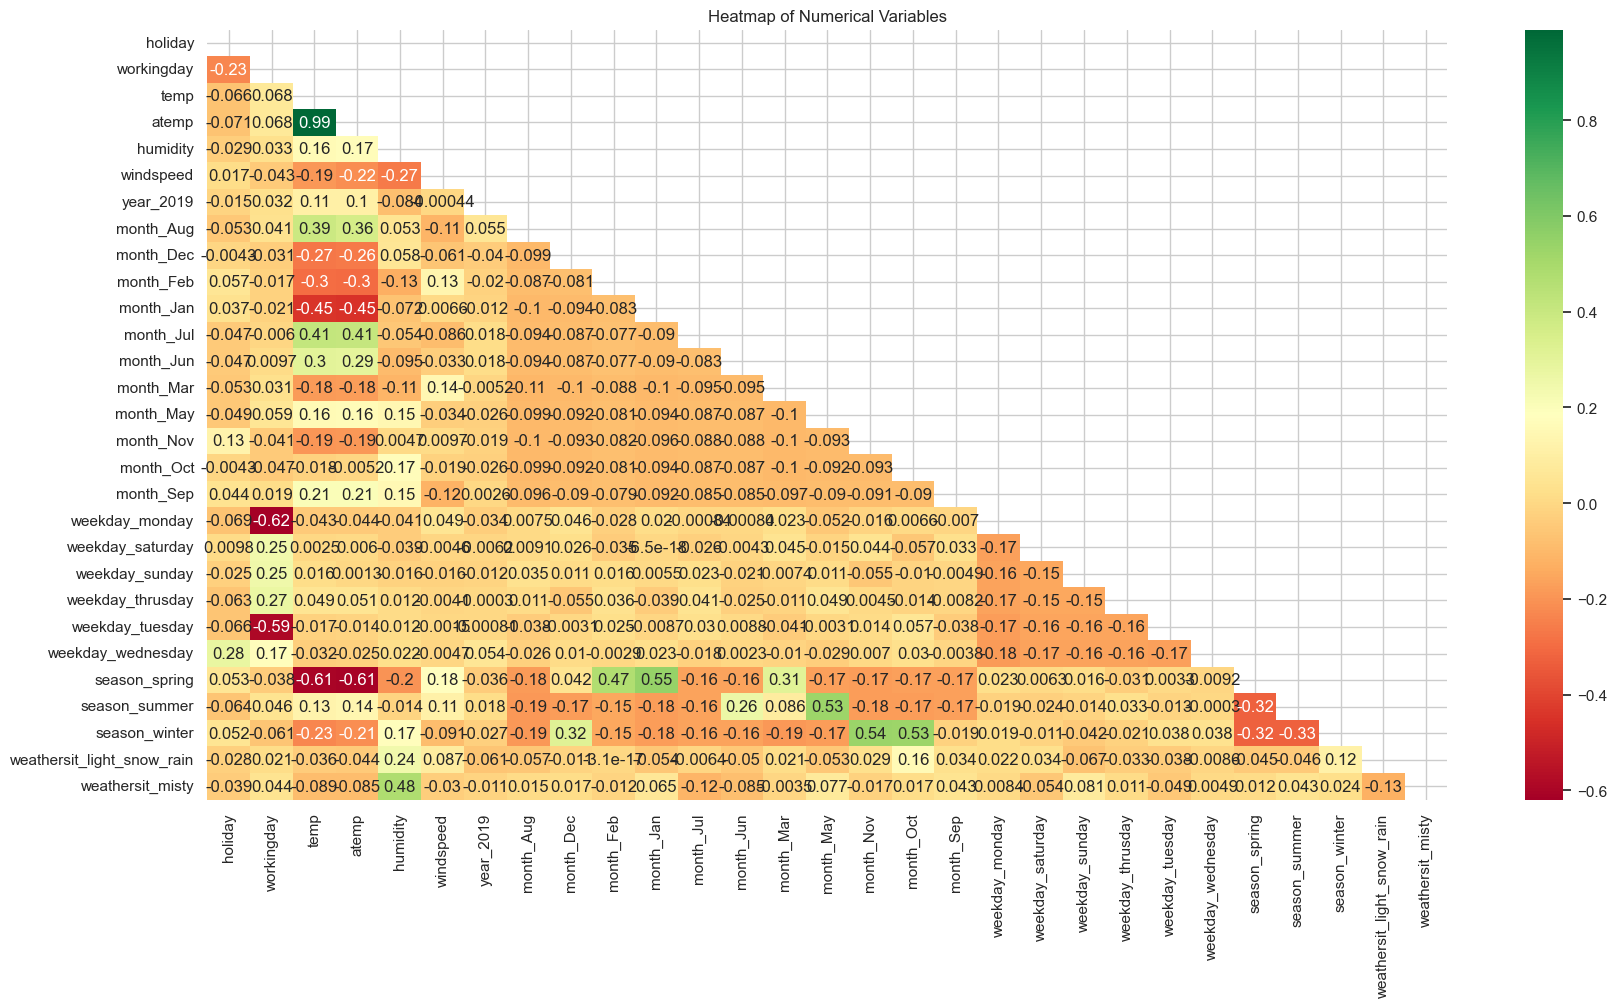

In [42]:
plt.figure(figsize=[20,10])
mask = np.triu(X_train_df.corr())
sns.heatmap(X_train_df.corr(),mask=mask,annot=True,cmap="RdYlGn")
plt.title('Heatmap of Numerical Variables')
plt.show()

#### Let's drop "atemp" variables as it is very highly correlated with "temp" variable.

In [43]:
X_train_df=X_train_df.drop(["atemp"],axis=1)
X_test_df=X_test_df.drop(["atemp"],axis=1)

### RFE Feature Selection Method

In [44]:
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=20)
selector=selector.fit(X_train_df,y_train)
print(selector.support_)
selected_features=X_train_df.columns[selector.support_]
print(selected_features)
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

[ True  True  True  True  True  True  True  True  True  True  True False
 False  True  True False  True  True False False False False False  True
  True  True  True  True]
Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_May', 'month_Nov', 'month_Sep', 'weekday_monday',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_light_snow_rain', 'weathersit_misty'],
      dtype='object')


##  Step 10 : Model Building - Check and Build the models using selected features

In [45]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)
model1=sm.OLS(np.array(y_train),X_train_sm)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.23e-188
Time:                        01:24:53   Log-Likelihood:                 525.61
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -920.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2887      0.041      7.108      0.000       0.209       0.368
holiday                       -0.0490      0.027     -1.817      0.070      -0.102       0.004
workingday                     0.0439      0.011      3.837      0.000       0.021       0.066
temp                           0.4509      0.038     11.761      0.000       0.376       0.526
humidity                      -0.1549      0.038     -4.117      0.000      -0.229      -0.081
windspeed                     -0.1871      0.025     -7.359      0.000      -0.237      -0.137
year_2019                      0.2316      0.008     29.054      0.000       0.216       0.247
month_Aug                      0.0151      0.024      0.640      0.522      -0.031       0.061
month_Dec                     -0.0480      0.018     -2.643      0.008      -0.084      -0.012
month_Feb                     -0.0348      0.021     -1.626      0.105      -0.077       0.007
month_Jan                     -0.0651      0.021     -3.066      0.002      -0.107      -0.023
month_Jul                     -0.0403      0.025     -1.639      0.102      -0.089       0.008
month_May                      0.0232      0.017      1.343      0.180      -0.011       0.057
month_Nov                     -0.0451      0.019     -2.395      0.017      -0.082      -0.008
month_Sep                      0.0809      0.021      3.780      0.000       0.039       0.123
weekday_monday                 0.0540      0.014      3.736      0.000       0.026       0.082
season_spring                 -0.0456      0.027     -1.717      0.087      -0.098       0.007
season_summer                  0.0397      0.023      1.709      0.088      -0.006       0.085
season_winter                  0.1090      0.023      4.814      0.000       0.065       0.154
weathersit_light_snow_rain    -0.2541      0.026     -9.723      0.000      -0.305      -0.203
weathersit_misty              -0.0586      0.010     -5.671      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       81.837   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.129
Skew:                          -0.776   Prob(JB):                     1.07e-50
Kurtosis:                       5.902   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check VIF Scores

In [46]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,108.225301
16,season_spring,8.536653
17,season_summer,6.594038
18,season_winter,6.258622
3,temp,4.908706
7,month_Aug,3.170233
11,month_Jul,2.798988
10,month_Jan,2.376855
14,month_Sep,2.223943
4,humidity,1.972105


### Let's drop "month_Aug" variables. High P value of coefficient > 0.05

In [47]:
X_train_sm=X_train_sm.drop(["month_Aug"],axis=1)
X_test_sm=X_test_sm.drop(["month_Aug"],axis=1)

In [48]:
model2=sm.OLS(np.array(y_train),X_train_sm)
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.20e-189
Time:                        01:24:53   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2970      0.038      7.722      0.000       0.221       0.373
holiday                       -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday                     0.0441      0.011      3.852      0.000       0.022       0.067
temp                           0.4527      0.038     11.846      0.000       0.378       0.528
humidity                      -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed                     -0.1873      0.025     -7.371      0.000      -0.237      -0.137
year_2019                      0.2318      0.008     29.103      0.000       0.216       0.247
month_Dec                     -0.0488      0.018     -2.692      0.007      -0.084      -0.013
month_Feb                     -0.0348      0.021     -1.626      0.105      -0.077       0.007
month_Jan                     -0.0650      0.021     -3.067      0.002      -0.107      -0.023
month_Jul                     -0.0510      0.018     -2.844      0.005      -0.086      -0.016
month_May                      0.0229      0.017      1.325      0.186      -0.011       0.057
month_Nov                     -0.0461      0.019     -2.456      0.014      -0.083      -0.009
month_Sep                      0.0723      0.017      4.349      0.000       0.040       0.105
weekday_monday                 0.0544      0.014      3.774      0.000       0.026       0.083
season_spring                 -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_summer                  0.0295      0.017      1.747      0.081      -0.004       0.063
season_winter                  0.1001      0.018      5.618      0.000       0.065       0.135
weathersit_light_snow_rain    -0.2549      0.026     -9.773      0.000      -0.306      -0.204
weathersit_misty              -0.0583      0.010     -5.655      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         24.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,97.176268
15,season_spring,5.786996
3,temp,4.882796
17,season_winter,3.876310
16,season_summer,3.487247
9,month_Jan,2.376854
4,humidity,1.967977
2,workingday,1.883298
8,month_Feb,1.868036
12,month_Nov,1.821786


### Let's drop "month_May" variables. High P value of coefficient > 0.05

In [50]:
X_train_sm=X_train_sm.drop(["month_May"],axis=1)
X_test_sm=X_test_sm.drop(["month_May"],axis=1)

In [51]:
model3=sm.OLS(np.array(y_train),X_train_sm)
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.80e-190
Time:                        01:24:53   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2868      0.038      7.605      0.000       0.213       0.361
holiday                       -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday                     0.0442      0.011      3.860      0.000       0.022       0.067
temp                           0.4616      0.038     12.262      0.000       0.388       0.536
humidity                      -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                     -0.1889      0.025     -7.441      0.000      -0.239      -0.139
year_2019                      0.2312      0.008     29.052      0.000       0.216       0.247
month_Dec                     -0.0474      0.018     -2.619      0.009      -0.083      -0.012
month_Feb                     -0.0334      0.021     -1.562      0.119      -0.075       0.009
month_Jan                     -0.0634      0.021     -2.991      0.003      -0.105      -0.022
month_Jul                     -0.0515      0.018     -2.868      0.004      -0.087      -0.016
month_Nov                     -0.0444      0.019     -2.371      0.018      -0.081      -0.008
month_Sep                      0.0723      0.017      4.346      0.000       0.040       0.105
weekday_monday                 0.0540      0.014      3.743      0.000       0.026       0.082
season_spring                 -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_summer                  0.0393      0.015      2.586      0.010       0.009       0.069
season_winter                  0.1021      0.018      5.752      0.000       0.067       0.137
weathersit_light_snow_rain    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
weathersit_misty              -0.0585      0.010     -5.668      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,93.259651
14,season_spring,5.687214
3,temp,4.731447
16,season_winter,3.846549
15,season_summer,2.818957
9,month_Jan,2.368479
4,humidity,1.937973
2,workingday,1.883163
8,month_Feb,1.863601
11,month_Nov,1.813720


### Let's drop "month_Feb" variables. High P value of coefficient > 0.05

In [53]:
X_train_sm=X_train_sm.drop(["month_Feb"],axis=1)
X_test_sm=X_test_sm.drop(["month_Feb"],axis=1)

In [54]:
model4=sm.OLS(np.array(y_train),X_train_sm)
result4=model4.fit()
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.52e-190
Time:                        01:24:54   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2756      0.037      7.433      0.000       0.203       0.348
holiday                       -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday                     0.0444      0.011      3.870      0.000       0.022       0.067
temp                           0.4764      0.036     13.064      0.000       0.405       0.548
humidity                      -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed                     -0.1879      0.025     -7.390      0.000      -0.238      -0.138
year_2019                      0.2309      0.008     28.978      0.000       0.215       0.247
month_Dec                     -0.0388      0.017     -2.248      0.025      -0.073      -0.005
month_Jan                     -0.0455      0.018     -2.548      0.011      -0.081      -0.010
month_Jul                     -0.0524      0.018     -2.916      0.004      -0.088      -0.017
month_Nov                     -0.0399      0.019     -2.152      0.032      -0.076      -0.003
month_Sep                      0.0737      0.017      4.430      0.000       0.041       0.106
weekday_monday                 0.0548      0.014      3.794      0.000       0.026       0.083
season_spring                 -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer                  0.0424      0.015      2.809      0.005       0.013       0.072
season_winter                  0.1038      0.018      5.845      0.000       0.069       0.139
weathersit_light_snow_rain    -0.2555      0.026     -9.791      0.000      -0.307      -0.204
weathersit_misty              -0.0583      0.010     -5.637      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,89.876090
13,season_spring,5.271262
3,temp,4.428481
15,season_winter,3.833476
14,season_summer,2.771107
4,humidity,1.936167
2,workingday,1.882983
12,weekday_monday,1.786263
10,month_Nov,1.770025
8,month_Jan,1.679010


### Let's drop "holiday" variables. High P value of coefficient > 0.05

In [56]:
X_train_sm=X_train_sm.drop(["holiday"],axis=1)
X_test_sm=X_test_sm.drop(["holiday"],axis=1)

In [57]:
model5=sm.OLS(np.array(y_train),X_train_sm)
result5=model5.fit()
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.20e-190
Time:                        01:24:54   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2690      0.037      7.267      0.000       0.196       0.342
workingday                     0.0521      0.011      4.826      0.000       0.031       0.073
temp                           0.4744      0.037     12.978      0.000       0.403       0.546
humidity                      -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                     -0.1883      0.025     -7.386      0.000      -0.238      -0.138
year_2019                      0.2311      0.008     28.929      0.000       0.215       0.247
month_Dec                     -0.0398      0.017     -2.302      0.022      -0.074      -0.006
month_Jan                     -0.0465      0.018     -2.596      0.010      -0.082      -0.011
month_Jul                     -0.0514      0.018     -2.854      0.004      -0.087      -0.016
month_Nov                     -0.0441      0.018     -2.390      0.017      -0.080      -0.008
month_Sep                      0.0714      0.017      4.289      0.000       0.039       0.104
weekday_monday                 0.0625      0.014      4.493      0.000       0.035       0.090
season_spring                 -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_summer                  0.0421      0.015      2.783      0.006       0.012       0.072
season_winter                  0.1038      0.018      5.832      0.000       0.069       0.139
weathersit_light_snow_rain    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
weathersit_misty              -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,89.132872
12,season_spring,5.262117
2,temp,4.424815
14,season_winter,3.833465
13,season_summer,2.770844
3,humidity,1.935362
9,month_Nov,1.745232
7,month_Jan,1.677718
1,workingday,1.656762
11,weekday_monday,1.649253


### No predictors with p -value greater than 0.05 , all are in acceptable range. So , let's drop "season_spring" variable of high VIF > 5

In [59]:
X_train_sm=X_train_sm.drop(["season_spring"],axis=1)
X_test_sm=X_test_sm.drop(["season_spring"],axis=1)

In [60]:
model6=sm.OLS(np.array(y_train),X_train_sm)
result6=model6.fit()
result6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          6.82e-190
Time:                        01:24:54   Log-Likelihood:                 516.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     494   BIC:                            -933.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2037      0.030      6.784      0.000       0.145       0.263
workingday                     0.0528      0.011      4.857      0.000       0.031       0.074
temp                           0.5492      0.027     20.533      0.000       0.497       0.602
humidity                      -0.1600      0.038     -4.265      0.000      -0.234      -0.086
windspeed                     -0.1969      0.026     -7.713      0.000      -0.247      -0.147
year_2019                      0.2297      0.008     28.578      0.000       0.214       0.245
month_Dec                     -0.0338      0.017     -1.952      0.051      -0.068       0.000
month_Jan                     -0.0504      0.018     -2.801      0.005      -0.086      -0.015
month_Jul                     -0.0411      0.018     -2.308      0.021      -0.076      -0.006
month_Nov                     -0.0343      0.018     -1.877      0.061      -0.070       0.002
month_Sep                      0.0864      0.016      5.402      0.000       0.055       0.118
weekday_monday                 0.0632      0.014      4.509      0.000       0.036       0.091
season_summer                  0.0733      0.011      6.665      0.000       0.052       0.095
season_winter                  0.1395      0.013     10.524      0.000       0.113       0.166
weathersit_light_snow_rain    -0.2488      0.026     -9.468      0.000      -0.300      -0.197
weathersit_misty              -0.0552      0.010     -5.307      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       73.135   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.330
Skew:                          -0.749   Prob(JB):                     1.40e-38
Kurtosis:                       5.442   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,57.712082
2,temp,2.331577
13,season_winter,2.091971
3,humidity,1.912778
9,month_Nov,1.689934
7,month_Jan,1.668536
1,workingday,1.655894
11,weekday_monday,1.648769
15,weathersit_misty,1.563992
6,month_Dec,1.482989


### Let's drop "month_Nov" variables. High P value of coefficient > 0.05

In [62]:
X_train_sm=X_train_sm.drop(["month_Nov"],axis=1)
X_test_sm=X_test_sm.drop(["month_Nov"],axis=1)

In [63]:
model7=sm.OLS(np.array(y_train),X_train_sm)
result7=model7.fit()
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.76e-190
Time:                        01:24:55   Log-Likelihood:                 514.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     495   BIC:                            -936.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1959      0.030      6.571      0.000       0.137       0.254
workingday                     0.0531      0.011      4.876      0.000       0.032       0.075
temp                           0.5582      0.026     21.164      0.000       0.506       0.610
humidity                      -0.1592      0.038     -4.233      0.000      -0.233      -0.085
windspeed                     -0.1969      0.026     -7.695      0.000      -0.247      -0.147
year_2019                      0.2297      0.008     28.507      0.000       0.214       0.246
month_Dec                     -0.0214      0.016     -1.332      0.183      -0.053       0.010
month_Jan                     -0.0456      0.018     -2.553      0.011      -0.081      -0.011
month_Jul                     -0.0421      0.018     -2.358      0.019      -0.077      -0.007
month_Sep                      0.0894      0.016      5.604      0.000       0.058       0.121
weekday_monday                 0.0640      0.014      4.551      0.000       0.036       0.092
season_summer                  0.0747      0.011      6.790      0.000       0.053       0.096
season_winter                  0.1268      0.011     11.089      0.000       0.104       0.149
weathersit_light_snow_rain    -0.2457      0.026     -9.344      0.000      -0.297      -0.194
weathersit_misty              -0.0547      0.010     -5.246      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       70.968   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.157
Skew:                          -0.732   Prob(JB):                     5.04e-37
Kurtosis:                       5.392   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,56.609791
2,temp,2.255917
3,humidity,1.912543
1,workingday,1.655454
10,weekday_monday,1.647532
7,month_Jan,1.634638
14,weathersit_misty,1.562901
12,season_winter,1.549988
8,month_Jul,1.434144
11,season_summer,1.433950


### Let's drop "month_Dec" variables. High P value of coefficient > 0.05

In [65]:
X_train_sm=X_train_sm.drop(["month_Dec"],axis=1)
X_test_sm=X_test_sm.drop(["month_Dec"],axis=1)

In [66]:
model8=sm.OLS(np.array(y_train),X_train_sm)
result8=model8.fit()
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.53e-191
Time:                        01:24:55   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1907      0.030      6.447      0.000       0.133       0.249
workingday                     0.0526      0.011      4.824      0.000       0.031       0.074
temp                           0.5684      0.025     22.506      0.000       0.519       0.618
humidity                      -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed                     -0.1943      0.026     -7.609      0.000      -0.244      -0.144
year_2019                      0.2296      0.008     28.473      0.000       0.214       0.245
month_Jan                     -0.0401      0.017     -2.306      0.022      -0.074      -0.006
month_Jul                     -0.0429      0.018     -2.402      0.017      -0.078      -0.008
month_Sep                      0.0909      0.016      5.715      0.000       0.060       0.122
weekday_monday                 0.0629      0.014      4.476      0.000       0.035       0.090
season_summer                  0.0765      0.011      6.997      0.000       0.055       0.098
season_winter                  0.1251      0.011     11.000      0.000       0.103       0.147
weathersit_light_snow_rain    -0.2425      0.026     -9.253      0.000      -0.294      -0.191
weathersit_misty              -0.0538      0.010     -5.172      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,55.654312
2,temp,2.065398
3,humidity,1.892915
1,workingday,1.653008
9,weekday_monday,1.641718
13,weathersit_misty,1.557302
6,month_Jan,1.547012
11,season_winter,1.529622
7,month_Jul,1.432560
10,season_summer,1.412937


### Since all VIF values are under 5 and no p value is less than 0.05. We can cosider the above model as the best possible model, as it seems to have a very low multicolinearity(VIF) between the predictors and the p-values for all the predictors seems to be significant.
### This looks like a very acceptable model and we can consider this Model 8 ( Result8) as the base model . Let's perform 5-fold cross-validation to evaluate the performance of the model

In [68]:
# Perform 5-fold cross-validation to evaluate model performance
cv_scores = cross_val_score(estimator, X_train_sm, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
cv_scores = -cv_scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean MSE: {cv_scores.mean()}")

Cross-Validation Scores:
[0.0077751  0.00809735 0.00998638 0.00753754 0.00870843]
Mean MSE: 0.008420958657475866


### Cross-Validation for Model Evaluation :
#### The 5-fold cross-validation yielded a mean MSE of 0.00842. This indicates consistent and strong predictive performance of the model across different data subsets.

### We will now conduct the Residual analysis of the model

## Step 11 : Residual Analysis of the train data

In [69]:
# 1.Predicting the Y_train value(Count) using the model
y_train_pred = result8.predict(X_train_sm)
y_train_pred.head()

instant
577    0.722741
427    0.526035
729    0.348979
483    0.611231
112    0.264984
dtype: float64

In [70]:
# 2.Calculating Residual value
residual = y_train - y_train_pred
residual.head()

instant
577    0.104917
427   -0.060779
729   -0.144883
483   -0.128258
112   -0.073889
dtype: float64

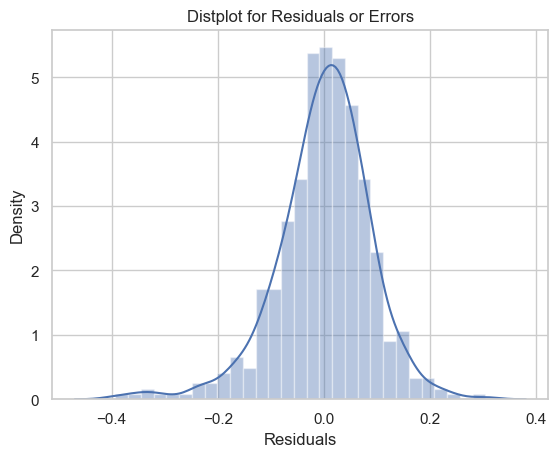

In [71]:
# 3.Visualising the residual value to check if the model not failing any conditions
sns.distplot(residual)
plt.xlabel('Residuals' )
plt.title('Distplot for Residuals or Errors')                 
plt.show()

### Observations :
    1. The distributions of residuals or errors suggests that the linear regression model fits the data well. The residuals being normally distributed and centered around zero are indicators of a good fit.
    2. The symmetry and centering around zero indicate that there is no systematic bias in the model's predictions. The errors are randomly distributed, which is desired.
    3. The consistent spread of the residuals implies that the assumption of homoscedasticity holds, meaning the model's predictions have constant variance across different levels of the input variables.

### Let's look the scatterplot patterns in the residuals
### Plotting the residuals (difference between y_train and y_train_pred) against y_train or y_train_pred can reveal patterns in the errors.

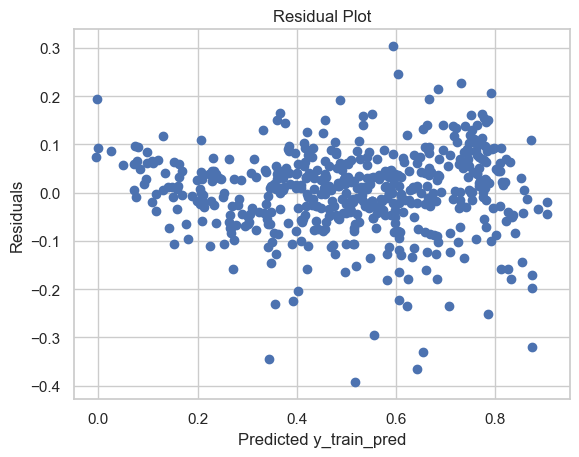

In [72]:
plt.scatter(y_train_pred, residual)
plt.xlabel('Predicted y_train_pred')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Observation:
    1. The residuals are randomly scattered around the horizontal axis (y=0). This indicates that the model is not biased and is capturing the underlying data pattern well.
    2. The residuals do not show increasing or decreasing spread across the predicted values, supporting the assumption of homoscedasticity, which is important for the validity of statistical tests in regression.
    3. The lack of patterns also suggests that the residuals are independent of each other, meeting another assumption of linear regression.

### Let's plot y_train against y_train_pred to visualize how closely the predicted values align with the actual values. Each point on the plot represents an instance from the training data.

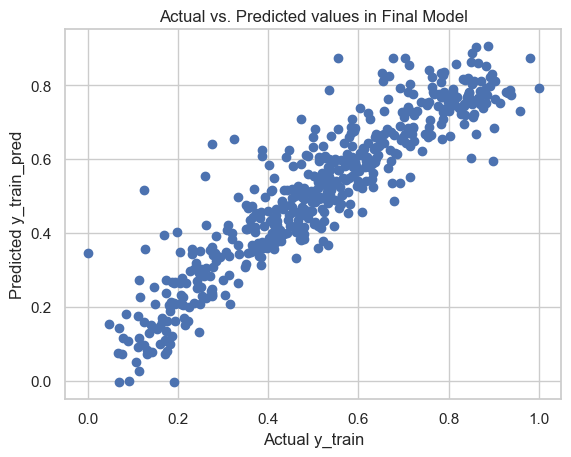

In [73]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual y_train')
plt.ylabel('Predicted y_train_pred')
plt.title('Actual vs. Predicted values in Final Model')
plt.show()

### Observations :
    1. The model predicts perfectly, all points lie on the 45-degree line (y = x). 
    2. No cluster of points is observed closely around the 45-degree line (y = x).
    3. The model likely captures the underlying patterns in the data well.

### Let's compare the distributions of y_train and y_train_pred using histograms or density plots to see how similar they are.

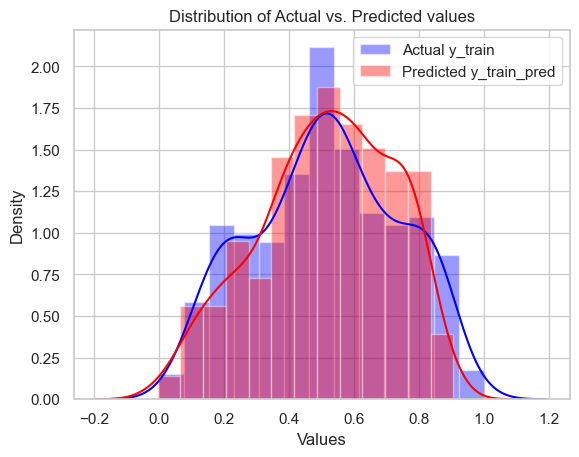

In [74]:
sns.distplot(y_train,color='blue', label='Actual y_train')
sns.distplot(y_train_pred, color='red', label='Predicted y_train_pred')
plt.xlabel('Values')
plt.legend()
plt.title('Distribution of Actual vs. Predicted values')
plt.show()


### Observations :
    1. The distributions of the actual values (Actual_y_train) and the predicted values (Predicted_y_train_pred) are quite similar. This suggests that the model captures the general trend of the data well.
    2. Both distributions have peaks around the same value, indicating that the model predicts the most frequent values in the training data accurately.
    3. The tails of the predicted distribution seem to cover a similar range as the actual distribution, indicating that the model does not excessively overpredict

### Scatter plot of actual vs. predicted values with an ideal line for reference

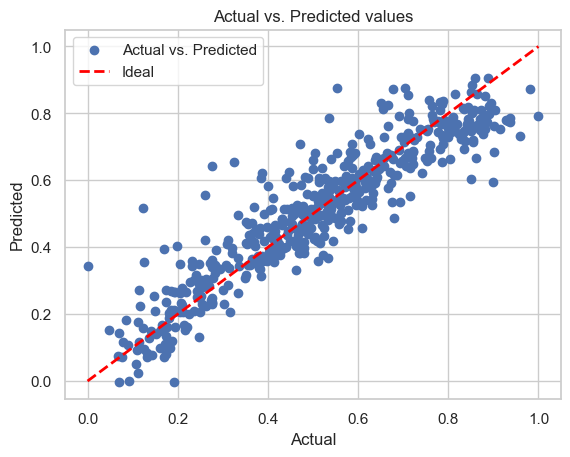

In [75]:
plt.scatter(y_train, y_train_pred , label='Actual vs. Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted values')
plt.legend()
plt.show()

### Observations:
    1. The scatter plot shows a strong linear relationship between the actual and predicted values, indicating that the model predictions are generally accurate.
    2. The red dashed line represents the ideal scenario where the predicted values perfectly match the actual values (i.e., y = x).
    3. The points are closely clustered around this ideal line, which suggests good predictive accuracy.

## Step 12 : Making Predictions using the final linear model

### We can now start to make predictions using the final mode

In [76]:
y_test_pred=result8.predict(X_test_sm)
y_test_pred.head()

instant
185    0.442461
536    0.931639
300    0.403016
222    0.606666
153    0.628274
dtype: float64

In [77]:
# R^2 Score of the test Data 
r_squared_test = round(r2_score(y_test, y_test_pred), 4)
print(r_squared_test)

0.8051


### The R-squared is approximately 80.51 % and not too different from the model we had build on the training data. Overall, the model demonstrates strong performance and reliability for predicting the target variable in this context.

### This is making it a very acceptable choice . Therefore, we can consider this Model 8 ( Result8)  as our base model.

## Step 13 : Steps for Further Model Refinement and Optimization

### One approach to enhance our model is by dropping the least significant variables. We'll begin by evaluating the impact of removing the "month_Jan" variable.

In [78]:
# Dropping least significant variable
X_train_reduced = X_train_sm.drop(columns=['month_Jan'])
X_test_reduced = X_test_sm.drop(columns=['month_Jan'])

# Refit the model
estimator.fit(X_train_reduced, y_train)
y_pred_train_reduced = estimator.predict(X_train_reduced)
y_pred_test_reduced = estimator.predict(X_test_reduced)

# Recalculate R-squared
r_squared_train=r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)
train_r2_reduced = r2_score(y_train, y_pred_train_reduced)
test_r2_reduced = r2_score(y_test, y_pred_test_reduced)

print(f"Train R-squared before removal of month_Jan :{r_squared_train * 100:.2f}% , after removal of month_Jan : {train_r2_reduced * 100:.2f}%")
print(f"Test R-squared before removal of month_Jan :{r_squared_test * 100:.2f}% , after removal of month_Jan  : {test_r2_reduced * 100:.2f}%")


Train R-squared before removal of month_Jan :84.48% , after removal of month_Jan : 84.32%
Test R-squared before removal of month_Jan :80.51% , after removal of month_Jan  : 80.70%


### Observation :
The marginal reduction in both train and test R-squared values suggests that "month_Jan" had a relatively minor impact on the model's predictive power. 

In [79]:
# Perform 5-fold cross-validation to evaluate model performance
train_cv_scores = cross_val_score(estimator, X_train_sm, y_train, cv=5, scoring='neg_mean_squared_error')
test_cv_scores = cross_val_score(estimator, X_test_sm, y_test, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
train_cv_scores = -train_cv_scores
test_cv_scores = -test_cv_scores
print("Before  reduction: Train Cross-Validation Scores:")
print(train_cv_scores )
print("Before  reduction: Test Cross-Validation Scores:")
print(test_cv_scores )

# Perform 5-fold cross-validation to evaluate reduced model performance
train_reduced_cv_scores = cross_val_score(estimator, X_train_reduced, y_train, cv=5, scoring='neg_mean_squared_error')
test_reduced_cv_scores = cross_val_score(estimator, X_test_reduced, y_test, cv=5, scoring='neg_mean_squared_error')
# Convert MSE scores to positive values
train_reduced_cv_scores = -train_reduced_cv_scores
test_reduced_cv_scores = -test_reduced_cv_scores
print("After reduction: Train Cross-Validation Scores:")
print(test_reduced_cv_scores )
print("After reduction: Test Cross-Validation Scores:")
print(test_reduced_cv_scores )

print(f" Before  removal of month_Jan: Train Mean MSE: {train_cv_scores.mean() * 100:.2f}% After removal of month_Jan: Train Mean MSE: {train_reduced_cv_scores.mean() * 100:.2f}%")
print(f" Before  removal of month_Jan: Test Mean MSE: {test_cv_scores.mean() * 100:.2f}% After removal of month_Jan: Test Mean MSE: {test_reduced_cv_scores.mean() * 100:.2f}%")

Before  reduction: Train Cross-Validation Scores:
[0.0077751  0.00809735 0.00998638 0.00753754 0.00870843]
Before  reduction: Test Cross-Validation Scores:
[0.01196557 0.01185128 0.00847191 0.00874988 0.00993158]
After reduction: Train Cross-Validation Scores:
[0.01187209 0.01178545 0.00828584 0.00866857 0.00986611]
After reduction: Test Cross-Validation Scores:
[0.01187209 0.01178545 0.00828584 0.00866857 0.00986611]
 Before  removal of month_Jan: Train Mean MSE: 0.84% After removal of month_Jan: Train Mean MSE: 0.85%
 Before  removal of month_Jan: Test Mean MSE: 1.02% After removal of month_Jan: Test Mean MSE: 1.01%


### Observation :
    The marginal reduction in both train and test R-squared values suggests that "month_Jan" had a relatively minor impact on the model's predictive power. 

In [80]:
model9=sm.OLS(np.array(y_train),X_train_reduced)
result9=model9.fit()
result9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.14e-191
Time:                        01:25:00   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1712      0.028      6.014      0.000       0.115       0.227
workingday                     0.0524      0.011      4.791      0.000       0.031       0.074
temp                           0.5960      0.022     26.667      0.000       0.552       0.640
humidity                      -0.1709      0.037     -4.558      0.000      -0.245      -0.097
windspeed                     -0.1888      0.026     -7.393      0.000      -0.239      -0.139
year_2019                      0.2286      0.008     28.267      0.000       0.213       0.244
month_Jul                     -0.0439      0.018     -2.450      0.015      -0.079      -0.009
month_Sep                      0.0928      0.016      5.816      0.000       0.061       0.124
weekday_monday                 0.0625      0.014      4.429      0.000       0.035       0.090
season_summer                  0.0827      0.011      7.770      0.000       0.062       0.104
season_winter                  0.1355      0.010     12.930      0.000       0.115       0.156
weathersit_light_snow_rain    -0.2391      0.026     -9.100      0.000      -0.291      -0.188
weathersit_misty              -0.0536      0.010     -5.129      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       65.304   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.523
Skew:                          -0.689   Prob(JB):                     5.61e-33
Kurtosis:                       5.257   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_reduced.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_reduced.values,i) 
                 for i in range(len(X_train_reduced.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
0,const,51.112035
3,humidity,1.881751
1,workingday,1.652961
8,weekday_monday,1.641474
2,temp,1.603317
12,weathersit_misty,1.557183
6,month_Jul,1.431646
9,season_summer,1.327517
10,season_winter,1.288076
11,weathersit_light_snow_rain,1.242930


### Let's compare the OLS Regression result of Model 8 ( Result 8 ) and Model 9 ( Result 9 )

In [82]:
## Re-calculating the co-efficients for ease
result8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.53e-191
Time:                        01:25:00   Log-Likelihood:                 514.04
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -940.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1907      0.030      6.447      0.000       0.133       0.249
workingday                     0.0526      0.011      4.824      0.000       0.031       0.074
temp                           0.5684      0.025     22.506      0.000       0.519       0.618
humidity                      -0.1643      0.037     -4.387      0.000      -0.238      -0.091
windspeed                     -0.1943      0.026     -7.609      0.000      -0.244      -0.144
year_2019                      0.2296      0.008     28.473      0.000       0.214       0.245
month_Jan                     -0.0401      0.017     -2.306      0.022      -0.074      -0.006
month_Jul                     -0.0429      0.018     -2.402      0.017      -0.078      -0.008
month_Sep                      0.0909      0.016      5.715      0.000       0.060       0.122
weekday_monday                 0.0629      0.014      4.476      0.000       0.035       0.090
season_summer                  0.0765      0.011      6.997      0.000       0.055       0.098
season_winter                  0.1251      0.011     11.000      0.000       0.103       0.147
weathersit_light_snow_rain    -0.2425      0.026     -9.253      0.000      -0.294      -0.191
weathersit_misty              -0.0538      0.010     -5.172      0.000      -0.074      -0.033
==============================================================================
Omnibus:                       67.331   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.535
Skew:                          -0.705   Prob(JB):                     2.77e-34
Kurtosis:                       5.298   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation :
    Both models perform similarly with minor differences. Model 8 has a marginally better fit based on R-squared, Adjusted R-squared, Log-Likelihood, AIC, and BIC. The removal of the variable month_Jan in Model 9 simplifies the model slightly but does not significantly impact the overall performance.

### Based on the slight performance edge and comprehensive inclusion of variables, Model 8 is generally preferable unless the simplicity of Model 9 offers significant advantages for your specific use case or interpretation needs.

## Step 14 : Model Evaluation

### Let us now build the linear equation for the final model
#### Based on the above coefficients, the equation stands as below - 

count=0.1907 + 0.0526 * workingday + 0.5684 * temp - 0.1643 * humidity - 0.1943 * windspeed + 0.2296 * year_2019 - 0.0401 * month_Jan - 0.0429 * month_Jul + 0.0909 * month_Sep + 0.0629 * weekday_monday + 0.0765 * season_summer + 0.1251 * season_winter - 0.2425 * weathersit_light_snow_rain - 0.0538 * weathersit_misty

### Based on the regression equation and the coefficients, we can infer the following about bike demand:
    - Summer and Winter: Bike demand is high during both summer and winter seasons due to the positive coefficients for season_summer (0.0765) and season_winter (0.1251).
    - Month of September: Bike demand increases during the month of September, as indicated by the positive coefficient for month_Sep (0.0909). This increase is particularly noticeable on working days (positive coefficient for workingday at 0.0526) and on Mondays (positive coefficient for weekday_monday at 0.0629).
    - Temperature: There is a positive relationship with temperature, shown by the positive coefficient for temp (0.5684). Higher temperatures lead to higher bike demand.
    - Year-on-Year Increase: Bike demand has increased from 2018 to 2019, as evidenced by the positive coefficient for year_2019 (0.2296).
    - Rainy and Snowy Conditions: During rainy and snowy conditions, bike demand decreases. This is reflected by the negative coefficients for weathersit_light_snow_rain (-0.2425) and weathersit_misty (-0.0538).
    - Specific Months: Bike demand decreases in January and July, suggested by the negative coefficients for month_Jan (-0.0401) and month_Jul (-0.0429).
    - Humidity: Higher humidity levels are associated with lower bike demand, as indicated by the negative coefficient for humidity (-0.1643).
    - Windspeed: High windspeed negatively affects bike sharing demand, leading to a decrease in bike usage, as indicated by the negative coefficient for windspeed (-0.1943).

### We will plot y_test vs y_pred to check the spread

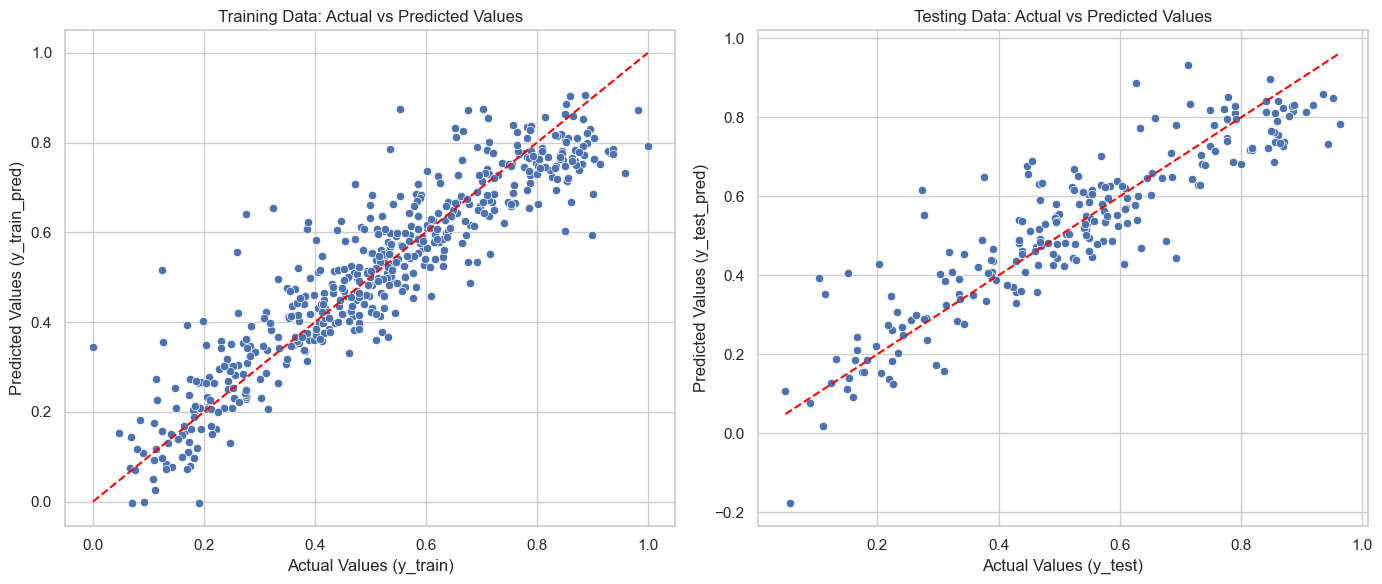

In [83]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot for training data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_train_pred)')
plt.title('Training Data: Actual vs Predicted Values')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  

# Subplot for testing data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_test_pred)')
plt.title('Testing Data: Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  

# Show the plot
plt.tight_layout()
plt.show()

### Observation :
    1. Training Data: Actual vs Predicted Values (Left Plot):
        - Strong alignment between actual and predicted values.
        - Most points lie close to the red dashed line.
        - High accuracy with minor prediction errors, especially at extreme values.
    2. Testing Data: Actual vs Predicted Values (Right Plot):
        - Good alignment between actual and predicted values.
        - Points generally close to the red dashed line.
        - Strong performance on test data.

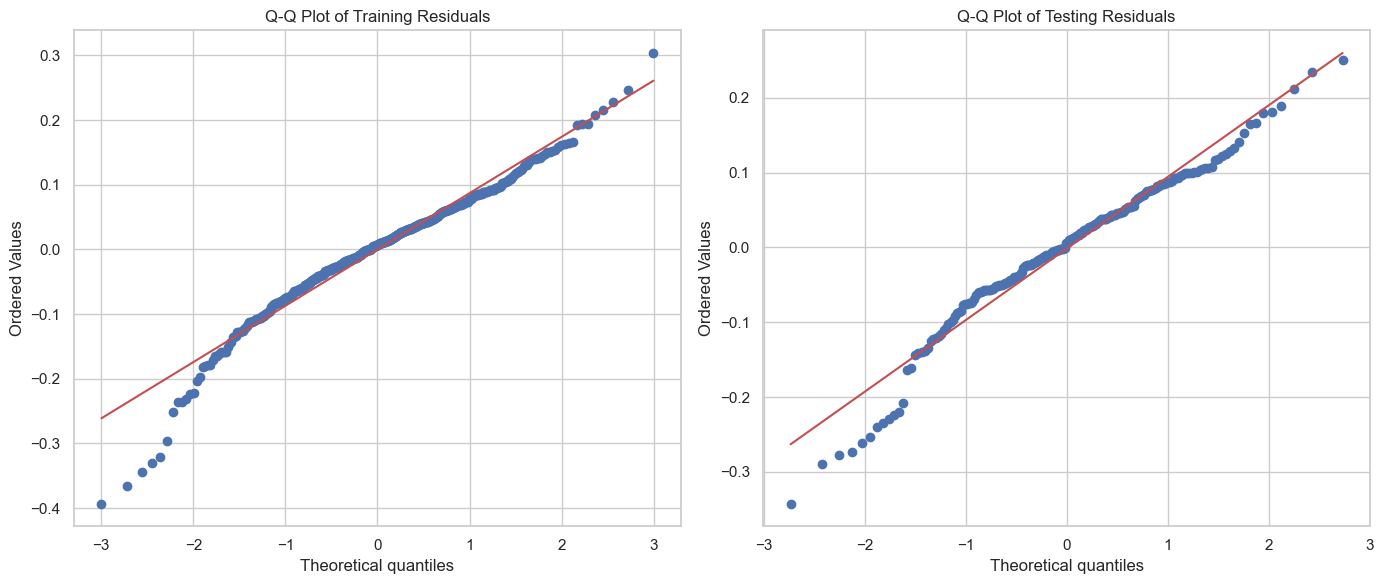

In [84]:
# Create a figure with two subplots
plt.figure(figsize=(14, 6))
# Calculate residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred
# Subplot for training residuals Q-Q plot
plt.subplot(1, 2, 1)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Training Residuals')
# Subplot for testing residuals Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Testing Residuals')
# Show the plot
plt.tight_layout()
plt.show()

### Observations :
    - The residuals for the training data generally follow the red line, indicating that they are approximately normally distributed.
    - The residuals for the testing data also follow the red line, but with more noticeable deviations compared to the training data.

### Comparision between Training and Testing dataset:
- Train MAE			: 0.0654	, Test MAE			: 0.0725
- Train RMSE			: 0.0883	, Test RMSE			: 0.0965
- Train R²			: 0.8448	, Test R²			: 0.8051
- Train Adjusted R²	: 0.8404	, Test Adjusted R²	: 0.7917

### Observations:
    1. The model performs well on both the training and testing datasets, with slight degradation in performance on the test data.
    2. The low MAE and RMSE values suggest that the model's predictions are accurate and close to the actual values.
    3. The high R-squared and adjusted R-squared values indicate that a large proportion of the variance in the target variable is explained by the model, both in the training and testing datasets.
    4. Overall, the model generalizes well to new data and provides reliable predictions.
    

## Conclusions and Recommendations :

### Q. Which variables are significant in predicting the demand for shared bikes? How Well the Significant Variables Describe Bike Demand ?
    - High R-squared: The model explains 84.48% of the variance in bike demand for the training set and 80.51% for the test set, indicating a strong fit.
    - Temperature: There is a strong positive relationship, with higher temperatures significantly increasing bike demand.
    - Year (2019): Shows a substantial increase in bike demand in 2019 compared to 2018, indicating a growing trend.
    - Weather Conditions: Adverse weather reduces demand, especially during light snow/rain and misty conditions.
    - Windspeed and Humidity: Both negatively impact demand, with higher windspeed and humidity levels leading to decreased bike usage.
    - Seasonal Effects: Higher demand is observed in Fall , Summer and Winter.
    - Monthly Effects: Lower demand in January and July, higher demand in September.
    - Weekday Monday: Positive effect on bike demand.
    - Working Day: Increases bike demand.

### The top 5 variables that are seen effecting and benefitting the Bike Rental count are as follows:
    1. Temperature : 0.5684
    2. Year : 0.2296
    3. Light Snow : -0.2425
    4. Windspeed : -0.1943
    5. winter : 0.1251

We also observe some variables with negative coefficients, indicating that as these independent variables increase, bike rentals tend to decrease.

Given that high temperatures and good weather positively impact bike rentals, it is recommended to increase bike availability and promotions during the summer months to further boost rentals.

### Recommendations for BoomBikes
	1. Leverage Temperature Effects:
		- Focus marketing and promotional efforts during warmer months when bike demand is higher.
	2. Yearly Trends:
		- Prepare for increased demand based on the substantial rise in bike rentals in 2019 compared to 2018. Monitor for a rebound post-pandemic.
	3. Weather Conditions:
		- Develop strategies to mitigate the impact of adverse weather on bike demand, such as promoting indoor cycling events or providing weather-resistant gear.
	4. Address Windspeed and Humidity:
		- Plan routes and infrastructure improvements to minimize the negative effects of high wind speeds and humidity on riders.
	5. Seasonal Strategies:
		- Increase bike availability and promotions during Fall, Summer, and Winter to match higher demand.
		- Focus on high-demand months like August, September, November, and December with special offers and increased bike supply.
	6. Monthly Trends:
		- Implement targeted marketing campaigns and promotions during months with higher demand (e.g., September).
		- Offer incentives or discounts in lower-demand months like January and July to boost rentals.
	7. Weekday and Working Day Focus:
		- Promote bike usage on Mondays and working days, possibly through partnerships with local businesses and commuter programs.